In [27]:
import numpy as np
from pylab import rcParams
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN
from collections import Counter
rcParams['figure.figsize'] = 9, 6

In [28]:
df = pd.read_csv('winequality.csv')
print(df.shape)
df.head()

(6463, 13)


,type1,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [29]:
data = df.iloc[:, 1:3]
print(data.shape)
data.head()

(6463, 2)


,fixed acidity,volatile acidity
0,7.0,0.27
1,6.3,0.30
2,8.1,0.28
3,7.2,0.23
4,7.2,0.23


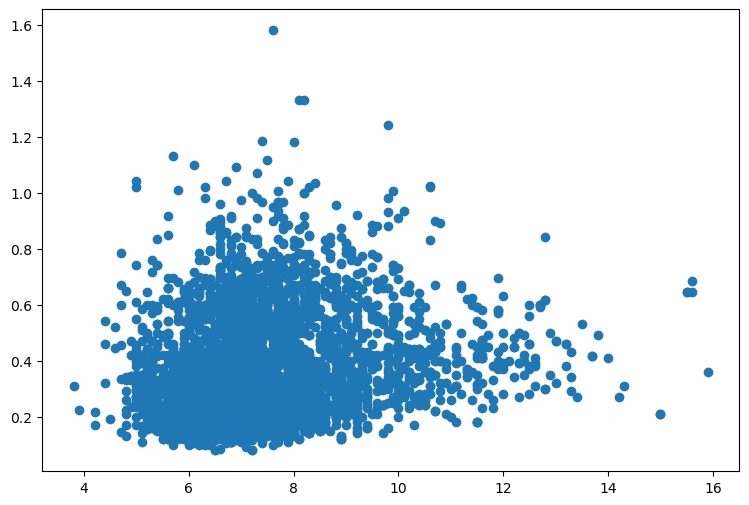

In [30]:
plt.scatter(data.iloc[:,0], data.iloc[:,1])
plt.show()

In [31]:
dbs = DBSCAN(eps=0.2, min_samples=20).fit(data)
dbs

DBSCAN(eps=0.2, min_samples=20)

In [32]:
print(Counter(dbs.labels_))
df_anom = pd.DataFrame(data)
print(df_anom[dbs.labels_ == -1]) # La etiqueta -1 indica que es un outlier

Counter({0: 6281, -1: 117, 1: 40, 2: 25})
      fixed acidity  volatile acidity
1502           14.2             0.270
1927            9.9             1.005
2130            9.8             0.930
2297            4.6             0.445
2601            4.5             0.190
...             ...               ...
6131            6.3             1.020
6169            7.6             1.580
6182            8.0             1.180
6409           11.1             0.440
6414           11.2             0.400

[117 rows x 2 columns]


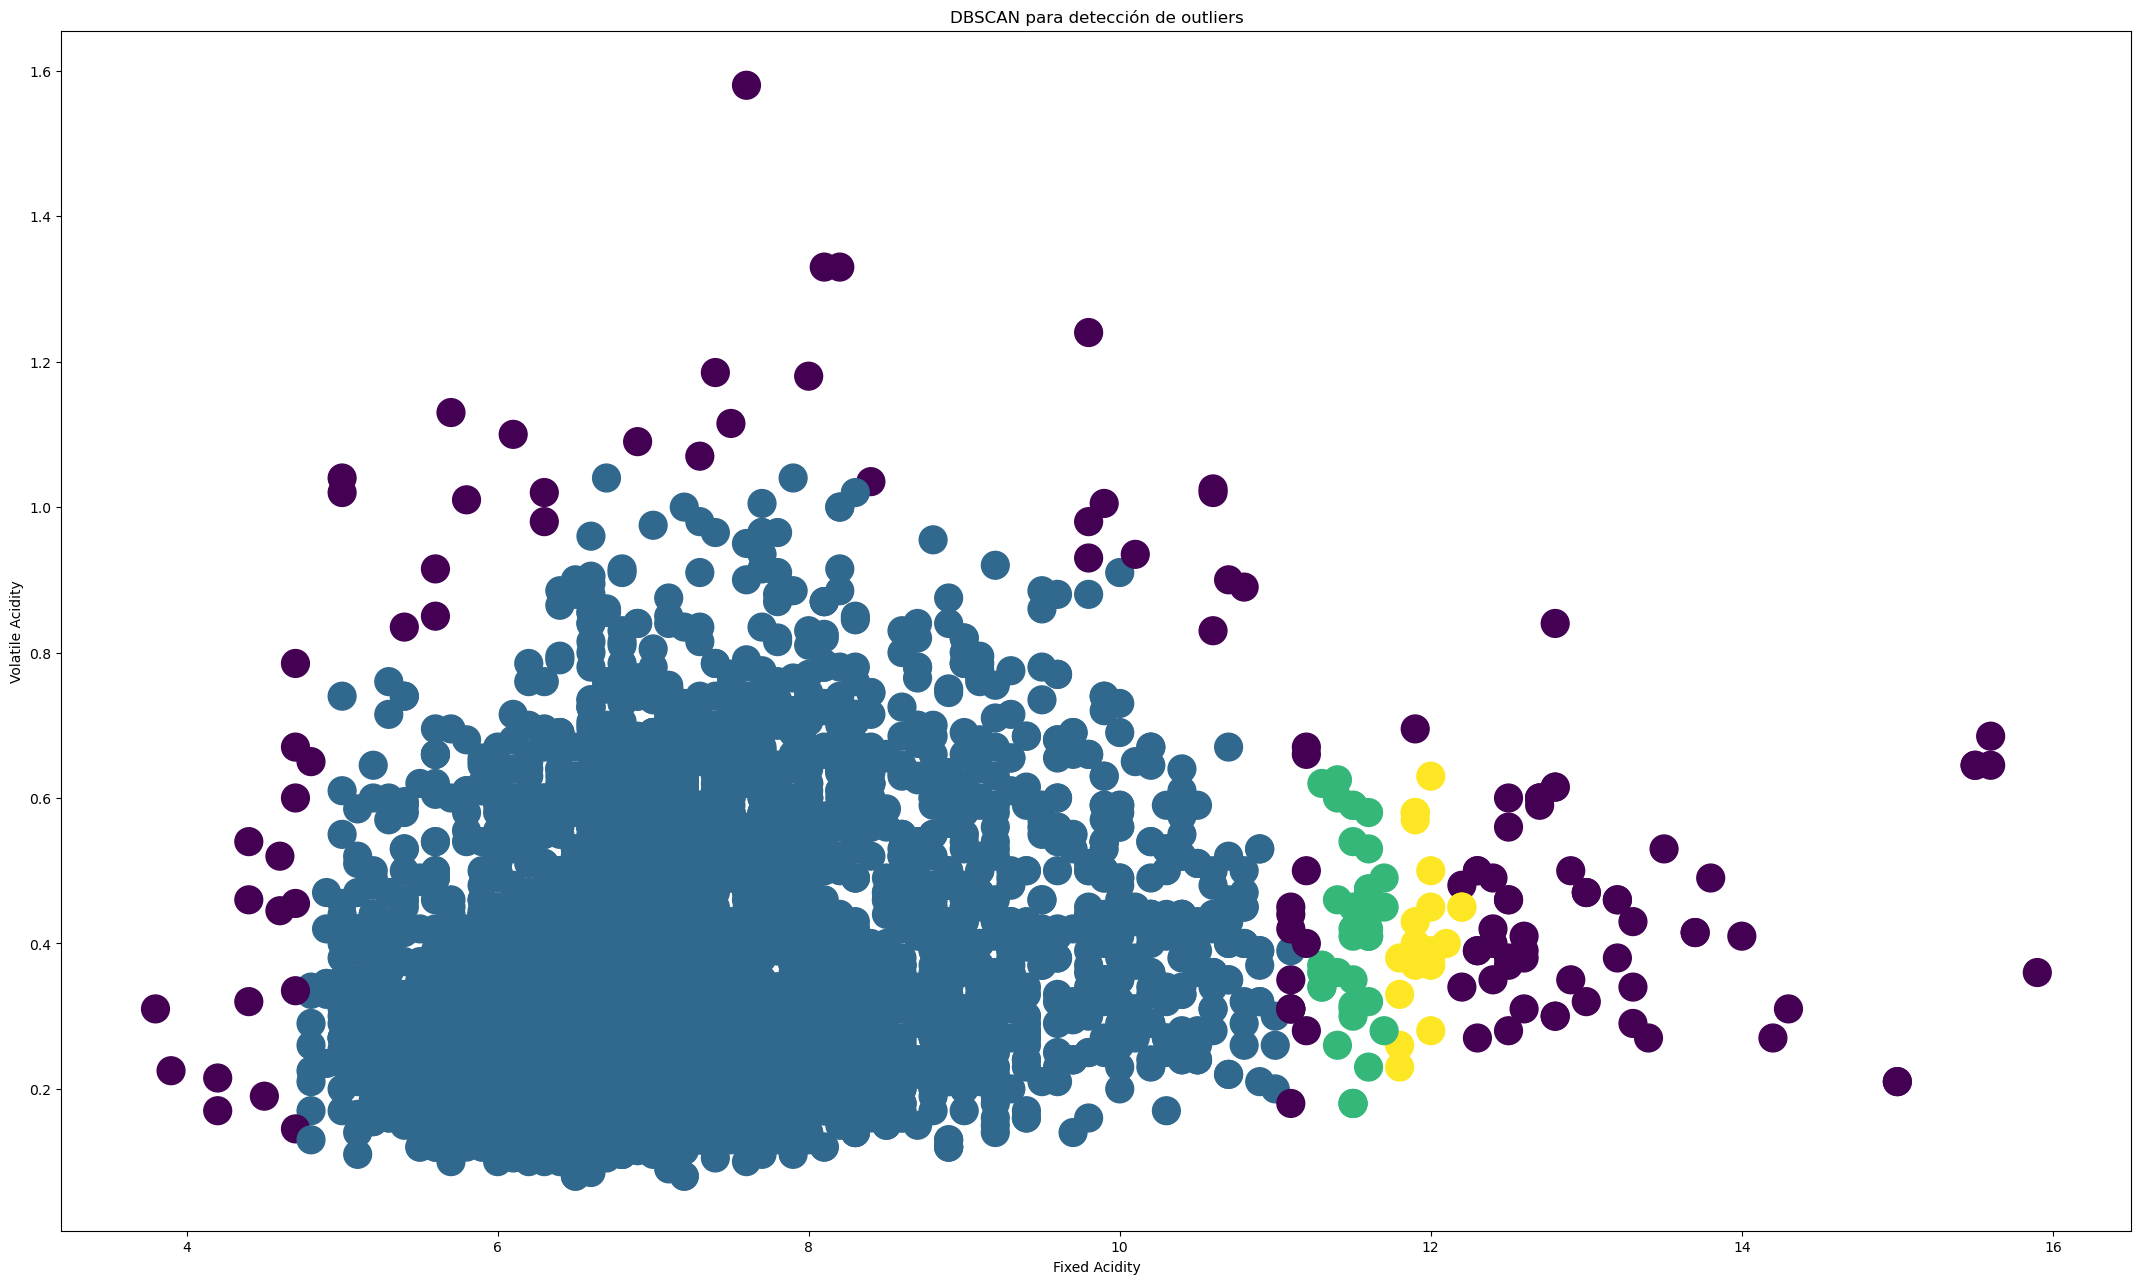

In [33]:
fig = plt.figure()
ax = fig.add_axes([.1, .1, 2.3, 2])
ax.scatter(data.iloc[:,0], data.iloc[:,1], c=dbs.labels_, s=400)
ax.set_xlabel('Fixed Acidity')
ax.set_ylabel('Volatile Acidity')
plt.title('DBSCAN para detección de outliers')
plt.show()

In [34]:
dbs.core_sample_indices_

array([   0,    1,    2, ..., 6460, 6461, 6462], dtype=int64)

### **Tarea:**

Aplica los modelos de agrupamiento presentados a los conjuntos Iris y Digits; compara los resultados de cada uno de ellos.

Datos iris

c:\Users\cemh0\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\cemh0\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


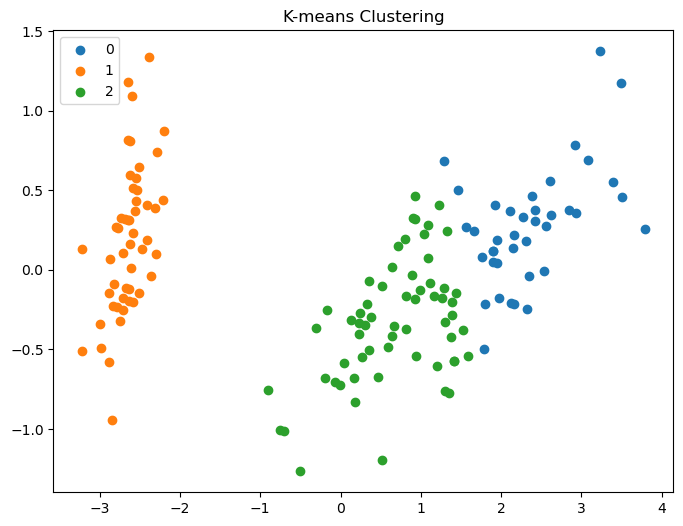

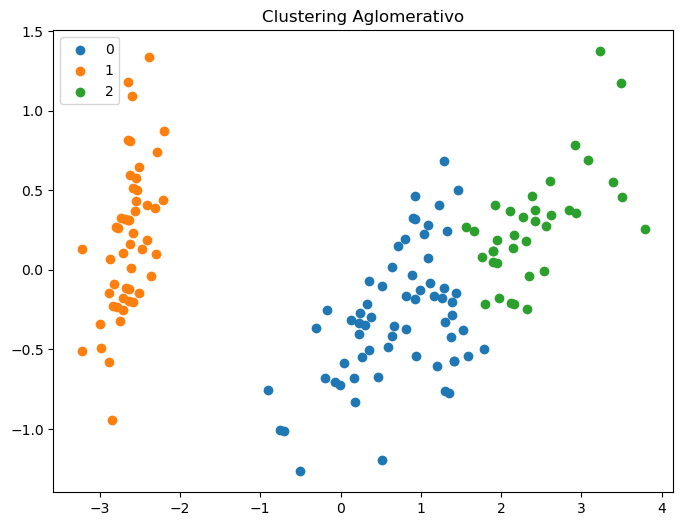

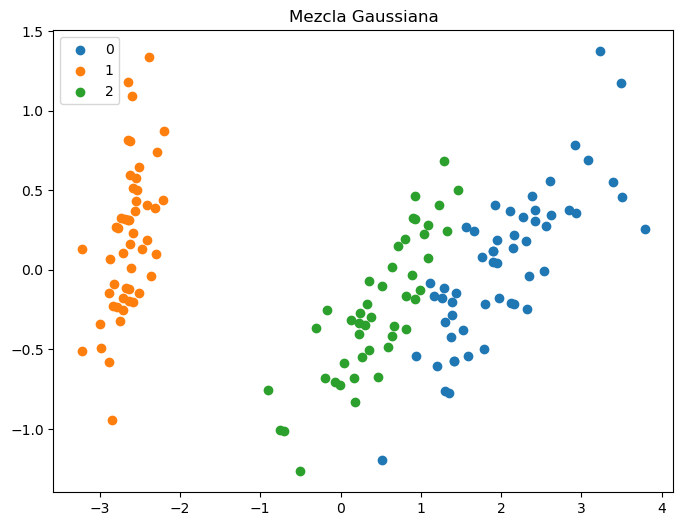

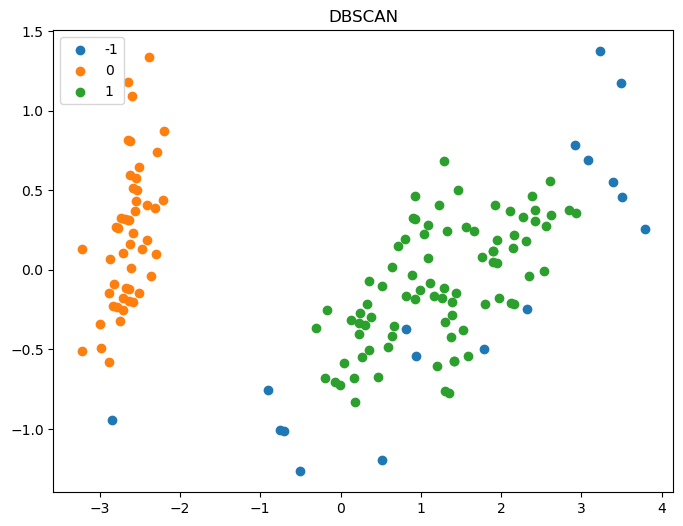

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

# Cargar el conjunto de datos iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Reducir la dimensionalidad a 2 componentes principales para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Aplicar K-means
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Aplicar Clustering Aglomerativo
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(X)

# Aplicar Mezcla Gaussiana
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Función para visualizar los resultados
def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(labels)
    for label in unique_labels:
        plt.scatter(X[labels == label, 0], X[labels == label, 1], label=label)
    plt.title(title)
    plt.legend()
    plt.show()

# Visualizar los resultados
plot_clusters(X_pca, kmeans_labels, "K-means Clustering")
plot_clusters(X_pca, agg_labels, "Clustering Aglomerativo")
plot_clusters(X_pca, gmm_labels, "Mezcla Gaussiana")
plot_clusters(X_pca, dbscan_labels, "DBSCAN")

Datos Digits

c:\Users\cemh0\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
c:\Users\cemh0\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


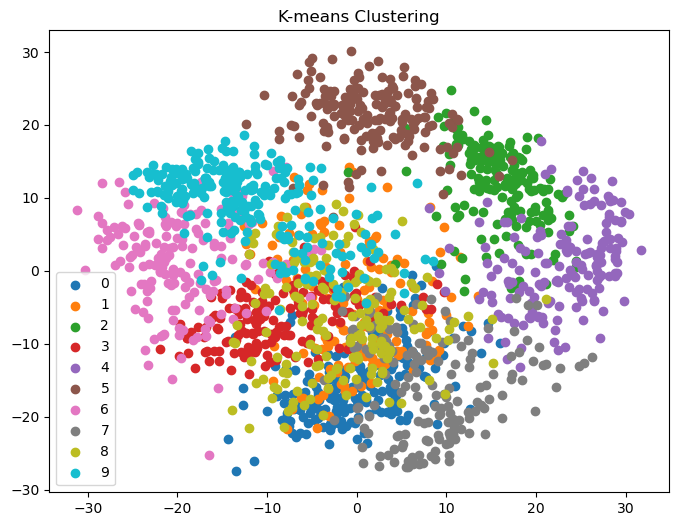

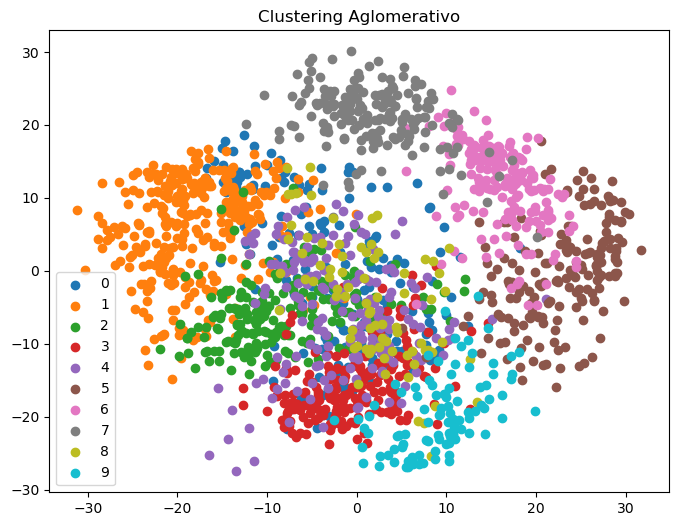

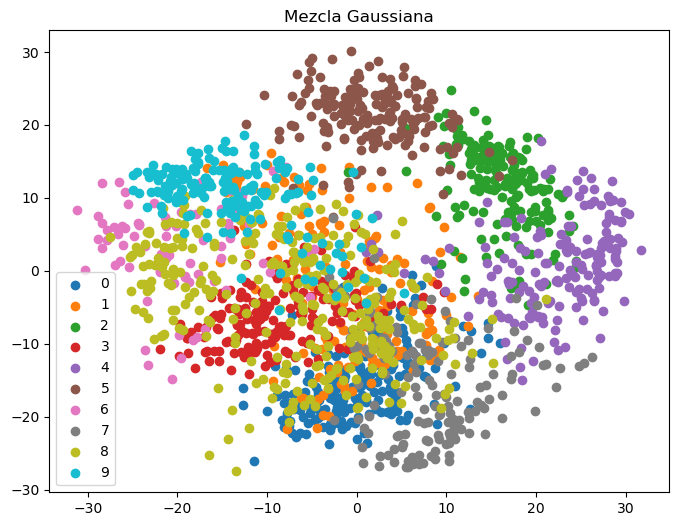

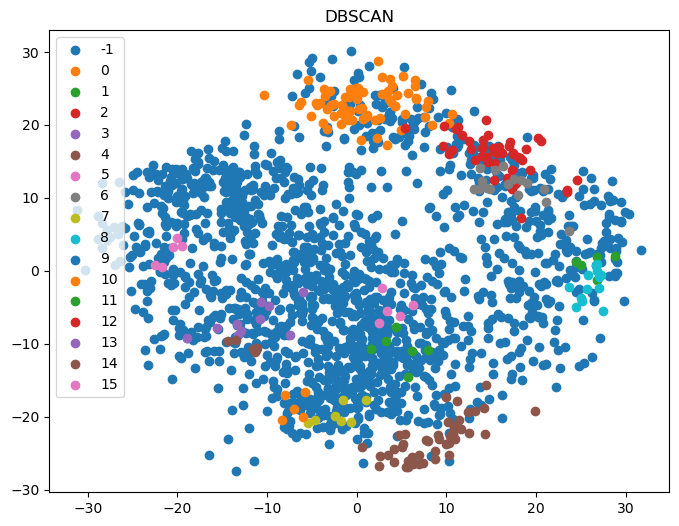

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

# Cargar el conjunto de datos digits
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Reducir la dimensionalidad a 2 componentes principales para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Aplicar K-means
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Aplicar Clustering Aglomerativo
agg_clustering = AgglomerativeClustering(n_clusters=10)
agg_labels = agg_clustering.fit_predict(X)

# Aplicar Mezcla Gaussiana
gmm = GaussianMixture(n_components=10, random_state=42)
gmm_labels = gmm.fit_predict(X)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=15, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

# Función para visualizar los resultados
def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(labels)
    for label in unique_labels:
        plt.scatter(X[labels == label, 0], X[labels == label, 1], label=label)
    plt.title(title)
    plt.legend()
    plt.show()

# Visualizar los resultados
plot_clusters(X_pca, kmeans_labels, "K-means Clustering")
plot_clusters(X_pca, agg_labels, "Clustering Aglomerativo")
plot_clusters(X_pca, gmm_labels, "Mezcla Gaussiana")
plot_clusters(X_pca, dbscan_labels, "DBSCAN")